# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

Observaciones: Para el Dataframe de "users" se calculó el 11% de valores nulos para la columna "city" lo que indica que es probable una correlación entre los datos para determinar sí hay alguna forma de poder vincularlos y recuperar esos datos y un 88% para "churn_date" este porcentaje es demasiado alto como para poder realizar alguna acción, lo más confiable será eliminar esa columna del análisis y sugerir al equipo de captura poner énfasis en la obtención de esos datos. Para el Dataframe "usage" las columnas "duration" y "length" presentan un porcentaje de 55% y 44% respectivamente lo que complica mucho el análisis pero permite la implementación de algunas opciones para tratar de salvar esos datos.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
print(users["user_id"].describe())
print(users["age"].describe())
print(users["user_id"].nunique())
print(users["age"].nunique())

count     4000.000000
mean     11999.500000
std       1154.844867
min      10000.000000
25%      10999.750000
50%      11999.500000
75%      12999.250000
max      13999.000000
Name: user_id, dtype: float64
count    4000.000000
mean       33.739750
std       123.232257
min      -999.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64
4000
63


- La columna `user_id` :4000 registros únicos, es decir, una lista de todos los usuarios, sin análisis estadístico válido
- La columna `age` ... : 63 registros únicos, una media de 33, pero con una std muy alta (123), esto por la presencia de sentinels(-999) lo que invalida el análisis estadístico realizado hasta ahora, se requieren acciones pertinentes para realizarlo

In [13]:
# explorar columnas numéricas de usage
print(usage["user_id"].describe())
print(usage["id"].describe())
print(usage["user_id"].nunique())
print(usage["id"].nunique())

count    40000.000000
mean     12002.405975
std       1157.279564
min      10000.000000
25%      10996.000000
50%      12013.000000
75%      13005.000000
max      13999.000000
Name: user_id, dtype: float64
count    40000.00000
mean     20000.50000
std      11547.14972
min          1.00000
25%      10000.75000
50%      20000.50000
75%      30000.25000
max      40000.00000
Name: id, dtype: float64
3999
40000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas ... son esencialmente listados con todos sus valores únicos, sin análisis estadístico pertinente a realizar hasta el momento, para esas dos columnas 

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users['city'].describe())
print(users['plan'].describe())

count       3531
unique         7
top       Bogotá
freq         808
Name: city, dtype: object
count       4000
unique         2
top       Basico
freq        2595
Name: plan, dtype: object


- La columna `city`: Con 7 valores únicos, y con una frecuencia relativamente alta para la ciudad de Bogotá, la columna muestra datos relevantes aún con su 11% de filas no determinadas
- La columna `plan`: Muestra esencialmente la aplicación de los dos planes (básico y premium), siendo el más frecuente el básico

In [15]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type`: con una tendencia mayoritaria para el tipo text, sobre call, lo que indica que es un 11% más frecuente este tipo de uso 


--- En la columna de "age" se encontraron valores sentinnels que impiden un análisis estadístico funcional para el dataframe "users" lo que requiere un tratamiento para ese tipo de datos específicos, el resto de columnas analizadas no presentan mayores complicaciones, seguiremos avanzando en el análisis.
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors="coerce")
users['reg_date'] = users['reg_date'].dt.year
print(users['reg_date'].value_counts().sort_index())

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce")

usage['date'] = usage['date'].dt.year
print(usage['date'].value_counts().sort_index())


2024.0    39950
Name: date, dtype: int64


En `reg_date`, ...Existen 40 registros "en el futuro" que probablemente sean un error de captura (2026), por otro lado, los datos de años anteriores desde el 2022, 2023 y 2024 muestran un númeor ocmparable entre sí 

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Todos los datos vienen del año 2024, un dato a considerar para el análisis, sobre todo con respecto al dataframe de usuarios 

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

Mi diagnóstico sobre los dataframes disponibles e smuy puntual, es necesario realizar acciones para establecer datos válidos sobre fechas en el registro de usuarios así como del uso de los paquetes; por otro lado, las estadícticas preliminares no permiten entender a fondo el tipo de distribución de los datos así como la relación entre causales de los diferentes dataframes. Es indispensable homogenizar formatos, determinar sí los senttinels representan algo en particular, así como definir sí columnas claves como "city" pueden utilizarse debido a su amplio porcentaje de inválidos

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [18]:
# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [19]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
print(f"Valores '?' en city: {(users['city'] == '?').sum()}")

Valores '?' en city: 0


In [20]:
# Marcar fechas futuras como NA para reg_date
año_minimo = 2022
año_maximo = 2024
años_invalidos = (
    (users['reg_date'] < año_minimo) | 
    (users['reg_date'] > año_maximo)
)

#print(f"Registros con años fuera de rango: {años_invalidos.sum()}")
users.loc[años_invalidos, 'reg_date'] = pd.NA
# Verificar cambios
print("\nDistribución después de la limpieza:")
print(users['reg_date'].value_counts(dropna=False))


Distribución después de la limpieza:
2024.0    1330
2023.0    1316
2022.0    1314
NaN         40
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [21]:
# Verificación MAR en usage (Missing At Random) para duration
proporcion_nulos_duration = usage["duration"].isna().groupby(usage["type"]).mean()
print("Proporción de nulos en duration por type:")
print(proporcion_nulos_duration)

Proporción de nulos en duration por type:
type
call    0.000000
text    0.999276
Name: duration, dtype: float64


In [22]:
# Verificación MAR en usage (Missing At Random) para length
proporcion_nulos_length = usage["length"].isna().groupby(usage["type"]).mean()
print("Proporción de nulos en duration por type:")
print(proporcion_nulos_length)

Proporción de nulos en duration por type:
type
call    0.99933
text    0.00000
Name: length, dtype: float64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length
De acuerdo con el análisis, la columna "duration" aplica solo para el "type" call y la columna "length" solo para el "type" "text" lo que implica que los datos presentan un MAR (Missing At Random) lo que señala que podrán ser útiles de acuerdo con la columna que se vinculen

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [23]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',      # Total de mensajes
    'is_call': 'sum',      # Total de llamadas  
    'duration': 'sum',     # Duración total de llamadas
    'length': 'sum'        # Longitud total de mensajes
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration,length
0,10000,7,3,23.70,258.0
1,10001,5,10,33.18,226.0
2,10002,5,2,10.74,225.0


In [24]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'total_messages', 'total_calls', 'total_duration', 'total_length']
# observar resultado
usage_agg.head(3)

,user_id,total_messages,total_calls,total_duration,total_length
0,10000,7,3,23.70,258.0
1,10001,5,10,33.18,226.0
2,10002,5,2,10.74,225.0


In [25]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='left')
user_profile.head(5)

,user_id,total_messages,total_calls,total_duration,total_length,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,258.0,Carlos,Garcia,38.0,Medellín,2022,Basico,NaN
1,10001,5,10,33.18,226.0,Mateo,Torres,53.0,<NA>,2022,Basico,NaN
2,10002,5,2,10.74,225.0,Sofia,Ramirez,57.0,CDMX,2022,Basico,NaN
3,10003,11,3,8.99,530.0,Mateo,Ramirez,69.0,Bogotá,2022,Premium,NaN
4,10004,4,3,8.01,229.0,Mateo,Torres,63.0,GDL,2022,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [41]:
# Resumen estadístico de las columnas numéricas
#print("=== RESUMEN ESTADÍSTICO - COLUMNAS NUMÉRICAS ===")
user_profile.describe()

,user_id,total_messages,total_calls,total_duration,total_length,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,23.317054,288.128032,48.138285
std,1154.898108,2.358416,2.144238,18.168095,180.906841,17.691541
min,10000.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.120000,184.000000,33.000000
50%,12000.000000,5.000000,4.000000,19.780000,268.000000,48.000000
75%,12999.500000,7.000000,6.000000,31.415000,361.000000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,2028.000000,79.000000


In [27]:
# Distribución porcentual del tipo de plan
plan_distribution = user_profile['plan'].value_counts(normalize=True) * 100
print(plan_distribution.round(2))

Basico     64.87
Premium    35.13
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

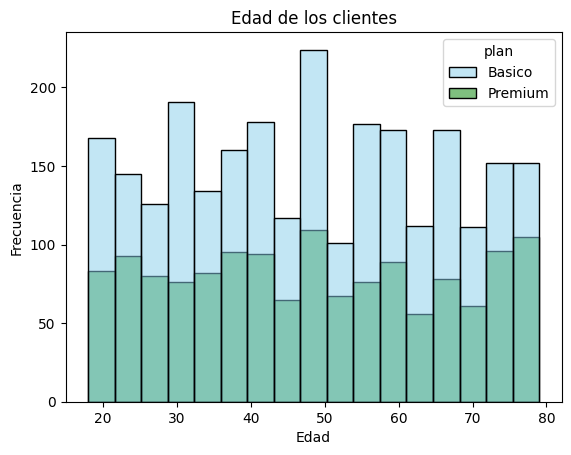

In [28]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, 
             x='age', 
             hue='plan',
             palette=['skyblue','green'])
plt.title('Edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución: En todos los rangos de edad se presentan usuarios de ambos planes, la distribución de las edades se asemeja a una distribución normal, sin embargo, la proporción de usuarios premium aumenta en los rangos de edad más altos (65, 70 y 80 años) en conjunto este segemnto es más proclive a contratar el plan premium

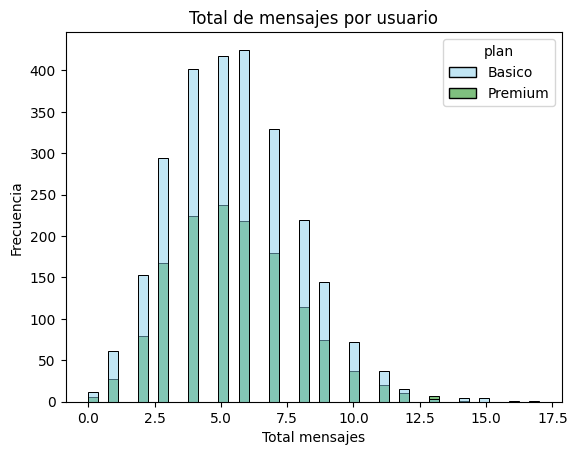

In [29]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, 
             x='total_messages', 
             hue='plan',
             palette=['skyblue','green'])
plt.title('Total de mensajes por usuario')
plt.xlabel('Total mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- La frecuencia del totoal de mensajes por usuario presenta una distribución sesgada a la derecha, con una clara tendencia que va de los3 a los 10 mensajes, sin una distribución preferencial por plan evidente, sin embargo, en el centro de la distribución los usuarios con plan premium son mayoría y esto indica que este tipo de plan es más común entre los usuarios que utilizan este servicio  

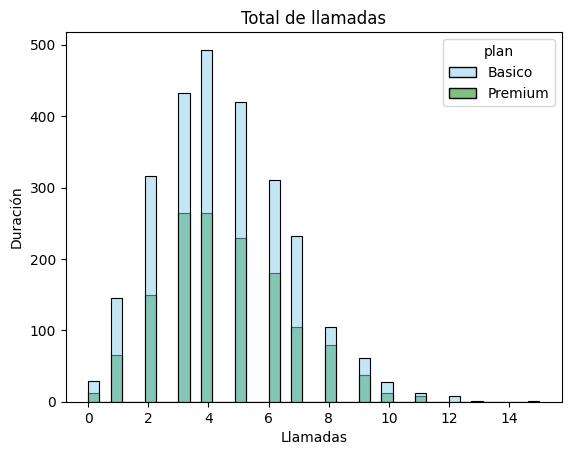

In [30]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, 
             x='total_calls', 
             hue='plan',
             palette=['skyblue','green'])
plt.title('Total de llamadas')
plt.xlabel('Llamadas')
plt.ylabel('Duración')
plt.show()

💡Insights: 
- Distribución ligeramente sesgada hacia la derecha, existe una mayoría muy evidente que realizan alrededor de 6 llamadas y una minoría que sesga la distribución hacia la derecha, estos pueden ser usuarios ballena que tienen un uso mucho más frecuente, resultaría importante considerar el tipo de costos que tienen estos usuarios para la empresa ocn la finalidad de poder aplicar estrategias de mitigación de costos o por el contrario mantenerlos incentivados mediante algún tipo de servicio preferencial  

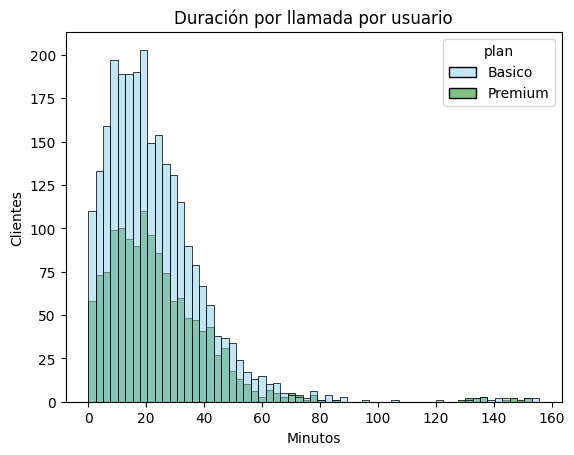

In [34]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, 
             x='total_duration', 
             hue='plan',
             palette=['skyblue','green'])
plt.title('Duración por llamada por usuario')
plt.xlabel('Minutos')
plt.ylabel('Clientes')
plt.show()

💡Insights: 
- La distribución de las llamadas tiene un sesgo hacia la derecha, al igual que los mensajes de texto y su longoitud, existe una preferencia por los clientes en hacer llamadas cortas, dentro del segmento de duración de hasta 35 minutos aproximadamente, el porcentaje entre planes no varía demasiado, pudiendo ser interpretado como uiguales, pero a partir de 35 minutos el porcentaje de usuarios premium es dominante, esto permite dirigir campañas o premiar la fidelidad de los clientes invitando a usar más este tipo de servicio sí es que los costos lo permiten

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

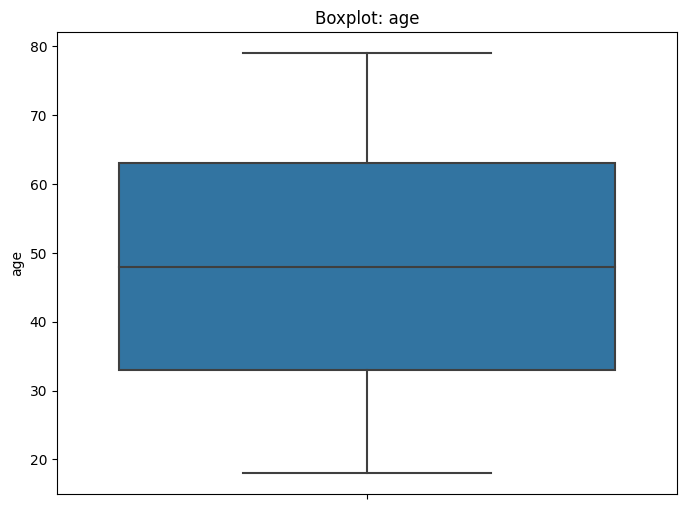

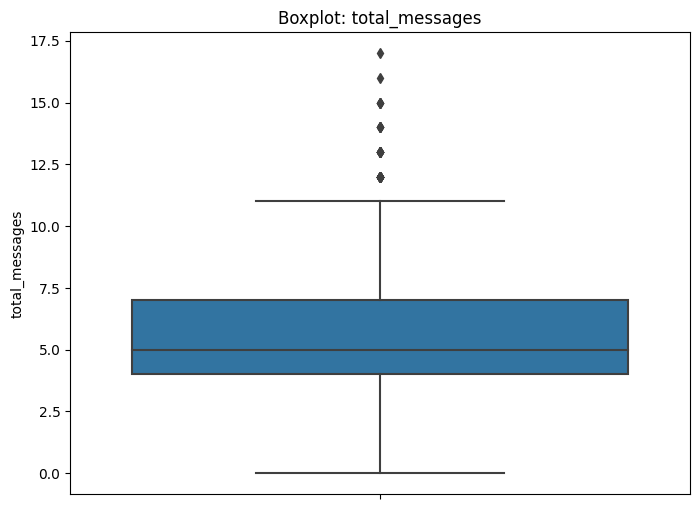

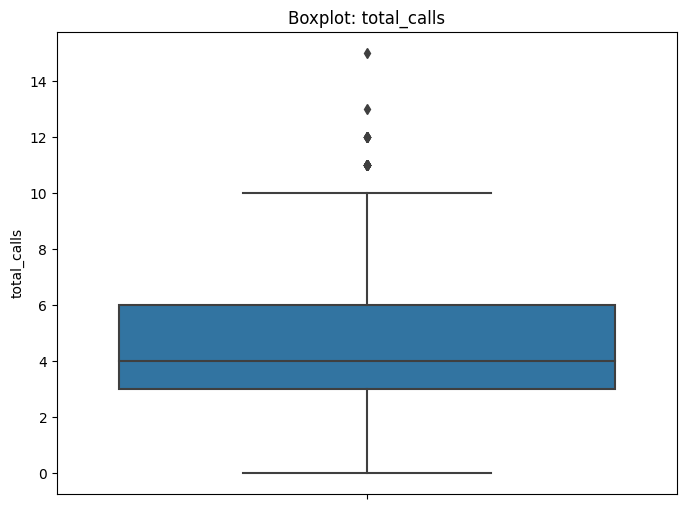

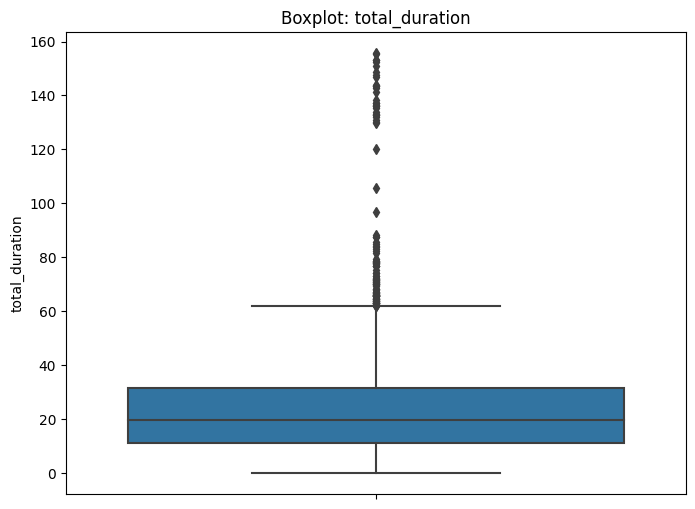

In [37]:

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'total_messages', 'total_calls', 'total_duration']
			
for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=user_profile, y=col)
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.show()


💡Insights: 
- Age: No presenta outliers, es una distribución homogénea desde los 20 hasta casi los 80 años, el boxplot es muy significativo.
- cant_mensajes: Para la cantidad de mensajes sí existen outliers bastante evidentes por encima de los 12 mensjaes por usuario, lo que implica directamente que existe un conjunto de usuarios que utilizan este servicio con una diferencia importante que el resto.
- cant_llamadas: Para la cantidad de llamadas también existen outliers, no en la misma cantidad que en los mensajes pero también se deduce que existe un conjunto de usuarios que presentan un uso mayor que la inmensa mayoría.
- cant_minutos_llamada: En este rubro es mucho más evidente que los outliers manifiestan una tendencia dentro de la distribución de los datos, este tipo de diferencia es mucho más evidente dado que la inmensa mayoria utliza el servicio de llamadas con un tiempo muy corto en comparación con los que hacen llamadas mucho más largas

In [39]:
# Calcular límites con el método IQR
columnas_limites = ['total_messages', 'total_calls', 'total_duration', 'total_length', 'age']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"\n--- {col} ---")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")



--- total_messages ---
Q1: 4.0
Q3: 7.0
IQR: 3.0
Límite inferior: -0.5
Límite superior: 11.5

--- total_calls ---
Q1: 3.0
Q3: 6.0
IQR: 3.0
Límite inferior: -1.5
Límite superior: 10.5

--- total_duration ---
Q1: 11.12
Q3: 31.415
IQR: 20.295
Límite inferior: -19.322500000000005
Límite superior: 61.8575

--- total_length ---
Q1: 184.0
Q3: 361.0
IQR: 177.0
Límite inferior: -81.5
Límite superior: 626.5

--- age ---
Q1: 33.0
Q3: 63.0
IQR: 30.0
Límite inferior: -12.0
Límite superior: 108.0


In [40]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,total_messages,total_calls,total_duration,total_length,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054,288.128032,48.138285
std,2.358416,2.144238,18.168095,180.906841,17.691541
min,0.000000,0.000000,0.000000,0.000000,18.000000
25%,4.000000,3.000000,11.120000,184.000000,33.000000
50%,5.000000,4.000000,19.780000,268.000000,48.000000
75%,7.000000,6.000000,31.415000,361.000000,63.000000
max,17.000000,15.000000,155.690000,2028.000000,79.000000


💡Insights: 
- cant_mensajes: Mantener outliers, definitivamente son una métrica importante dentro del análisis, entender la aportación de usuarios ballena es importante para poder dirigir estartegías competiutivas para este segmento, sin embargo, resulta indispensable poder vincular este nivel de uso con algún parámetro operativo de la empresa con el fin de poder entender sí estos usuarios saturan el sistema o por el contrario no representan una inversión de recursos considerable
- cant_llamadas: Mantener los outliers; al igual que el la categoria anterior, el consumo de estos usuarios permite entender las necesidades reales del mercado y bajo esta métrica establecer estrategias que acompañen a estos usuarios entendiendo los recursos que la empresa necesita invertir para retenerlos u ofrecerles un servicio personalizado.
- cant_minutos_llamada: mantener los outliers, la dispersión de los datos es considerable pero permite establecer parámetros funcionales para la empresa

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [62]:


# Crear columna grupo_uso
import pandas as pd
import numpy as np

def grupo_uso(row):
    if row['total_messages'] < 5 and  row['total_calls'] < 5:
            return "Bajo uso"
    elif row['total_messages'] < 10 and row['total_calls'] < 10:
        return "Uso medio"
    else: 
            return "Alto uso"
user_profile["grupo_uso"] = user_profile.apply(grupo_uso, axis=1)


In [63]:
# verificar cambios
user_profile.head()

,user_id,total_messages,total_calls,total_duration,total_length,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_edad,grupo_uso
0,10000,7,3,23.70,258.0,Carlos,Garcia,38.0,Medellín,2022,Basico,NaN,Adulto,Uso medio
1,10001,5,10,33.18,226.0,Mateo,Torres,53.0,<NA>,2022,Basico,NaN,Adulto,Alto uso
2,10002,5,2,10.74,225.0,Sofia,Ramirez,57.0,CDMX,2022,Basico,NaN,Adulto,Uso medio
3,10003,11,3,8.99,530.0,Mateo,Ramirez,69.0,Bogotá,2022,Premium,NaN,Adulto Mayor,Alto uso
4,10004,4,3,8.01,229.0,Mateo,Torres,63.0,GDL,2022,Basico,NaN,Adulto Mayor,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [46]:
# Crear columna grupo_edad
import pandas as pd
import numpy as np
user_profile["grupo_edad"] = np.where(user_profile["age"] < 30, "joven",
                                     np.where(user_profile["age"] <= 60, "Adulto", "Adulto Mayor"))

In [49]:
# verificar cambios
user_profile.head()

,user_id,total_messages,total_calls,total_duration,total_length,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_edad
0,10000,7,3,23.70,258.0,Carlos,Garcia,38.0,Medellín,2022,Basico,NaN,Adulto
1,10001,5,10,33.18,226.0,Mateo,Torres,53.0,<NA>,2022,Basico,NaN,Adulto
2,10002,5,2,10.74,225.0,Sofia,Ramirez,57.0,CDMX,2022,Basico,NaN,Adulto
3,10003,11,3,8.99,530.0,Mateo,Ramirez,69.0,Bogotá,2022,Premium,NaN,Adulto Mayor
4,10004,4,3,8.01,229.0,Mateo,Torres,63.0,GDL,2022,Basico,NaN,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

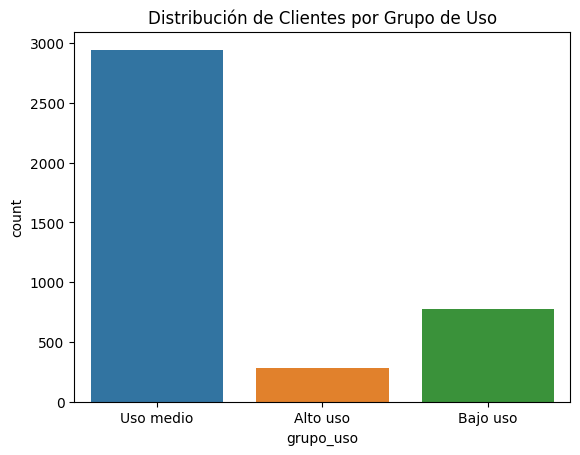

In [64]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de Clientes por Grupo de Uso')
plt.show()

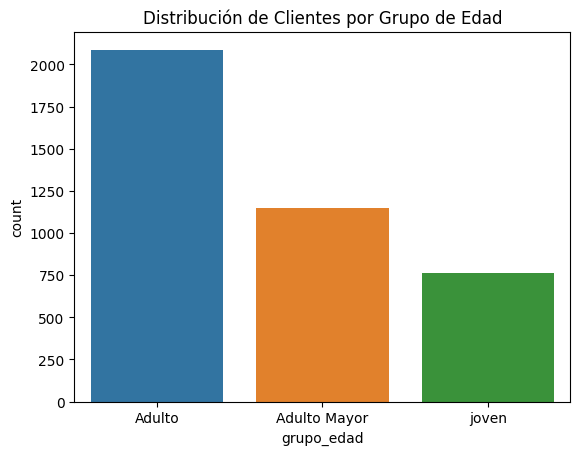

In [51]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de Clientes por Grupo de Edad')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

Los valores nulos dentro de columnas como "length" y "duration" estaban relacinados con otras columnas y esos valores nulos tienen sentido dentro del análisis, por otro lado, la cumna de "city" con un 11% de valores nulos es claramente un área de oportunidad importante para una segmentación geográfica, así como la columna "churn_date" con un entendible 88% de valores nulos dado que se refiere al % de abandono queda fuera del análisis, sin embargo y relacionado a esta última columna, valdría la pena considerar una fecha de inicio de los usuarios para poder segmentar por tiempo e implementar alguna estrategia de fidelización adecuada.
Se clasificaron 3 segmentos por edad, siendo el valor más frecuente entre 30 y 60 años, esto podría vincularse directamente a campañas de marketing o fidelización. Por otro lado, también se segmentaron los datos por el uso de los servicios de llamadas y mensajes, mostrando que el porcetaja menor de los usuarios son ballenas con un uso considerablemente más alto que el 85% de los usuarios totales, este datopor sí solo representa un área de análisis nueva.
Definitivamente el segmento de asultos entre 30 y 60 años es el conjunto más importante para la empresa; es el más numeroso, alrededor del 55% de los usuarios totales, además de representar un segmento económicamente más estable y con perspectivas de uso diario diversas (negocios, familia, amigos) representando un abanico de oportunidades considerable al momento de vincularse el servicio de llamadas y mensajes como una forma (expoeriencia) de conectividad más completa.
Los patrones de uso extremo en duración de llamadas y longitud de mensajes tienen una relación clara con el paquete premium lo que indica que son usuarios comprometidos con el servicio y que se saben usarios de un conjunto de opciones que les permiten hacer un uso extensivo del servicio, además pueden estar vinculados a usos más específicos del servicio, es decir, llamadas de más de 30 minutos reflejan una conversación compleja atribuible a temas familiares o de negocios lo que implica un aprovechamiento de las llamadas que puede ser aprovechado por marketing.
Definitivamente se tendría que valorar la inversión de recursos de la empresa sobre estos usuarios ballena, considerando que el uso extremo no representa una mayor inversión de recursos, este tipo específico podría complementarse con tonos de llamada especiales, incluir complementos como manos libres o accesorios de conectividad para realizar este tipo de llamadas con mayor facilidad para el usuario puede ser una mejora considerable dentro de la experiencia de uso, especificar el tipo de cobertura del servicio entre países y áreas específicas como carreteras podría ser un complemento atractivo para segmentos con un uso de llamadas duraderas. De la misma forma, el uso bajo en la duración de llamadas y longitudes cortas en los mensajes permite entender que situaciones cotidianas y tipos de comunicación vnculadas a oraciones cortas y llamadas rápidas puede ser atribuible a un consumo mas preciso, regresando a la inversión de la empresa en los recursos para saturar o no las líneas, se podrían implementar etsrategias sobre un ancho de banda para atender a más usuarios al inicio de la llamada y de esta forma lograr un servicio adecuado para llamadas y mensjaes cortos que generen una experiencia agradable al usuario.

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
-Existe un porcentaje importante sobre datos faltantes en ciudades, sin duda este tipo de datos es fundamental para lograr un análisis regional satisfactorio, se recomienda ampliamente implementar un procedimiento de captura más eficiente. Existe una columna de terminación de contrato con los usuarios (churn_date) sin embargo, no hay una de inicio la cual, sería ideal para poder identificar temporalmente la implementación de estrategias de fidelización y/o aveptación de promociones. 


🔍 **Segmentos por Edad**
- Existe un rango de edad significativamente mayoritario (30 a 60 años) lo que implica alrededor del 55% de lo usuarios, este tipo de segmento debería de ser consideado para la implementación de estrategias significativas sobre retención y manejo de cuentas en general


📊 **Segmentos por Nivel de Uso**
- Existe un porcentaje pequeño de usuarios ballena que mantienen un uso prolongado en la duración de llamadas, identificar la inversión de recursos que invierte la empresa en este tipo de consumo es fundamental a la hora de poder seleccionar el tipo de servicio que se puede ofrecer a este tipo de clientes con consumos tan altos.


➡️ Esto en conjunto sugiere que la captura de datos tiene áreas de oportunidad relevantes para la mejora en la capacidad y alcance de los análisis disponibles, así como la intersección de diferentes áreas de la empresa para concretar una estrategia a nivel empresarial. También es cierto que los datos actualmente disponibles representan panoramas significativos con respecto al tipo de uso que los usuarios de los diferentes planes utilizan, esto sin duda es de mucha utilidad para la elección de estrategias comerciales y la medición de su efectividad. En conclusión, el presente análisis representa un panorama muy útil para vincular áreas de oportunidad como información actual y representa el tipo de uso que los usuarios tienen como preferencia.


💡 **Recomendaciones**
- Aumentar la captura de datos, implementar columnas que complementen los datos ya capturados.
- Mejorar la comunicación y el flujo de información sobre los diferentes departamentos de la empresa con la intención de póder vincular información con un alcance más profundo

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`